<a href="https://colab.research.google.com/github/mtaman-2021391/Mausom-Tamang-github.io/blob/main/yolo_camps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying Homeless Camps Using YOLO

- **Author**: Bo Zhao, Professor, zhaobo@uw.edu  
- **Affiliation**: Department of Geography, University of Washington

In this lab, you will explore how computer vision can be applied to sensitive spatial phenomena—specifically, the identification of homeless encampments using deep learning techniques. You will work with YOLOv8 (You Only Look Once), a state-of-the-art object detection model, to detect urban features from Google Street View images. The lab introduces two core approaches: (1) using a pretrained YOLO model, and (2) fine-tuning YOLO on a custom dataset labeled with “camp” structures.

This hands-on activity bridges geospatial analysis, deep learning, and critical social inquiry. By the end, you’ll not only understand the technical pipeline behind object detection, but also engage with ethical questions around surveillance, visibility, and algorithmic decision-making in urban environments.


## Objectives

- Understand how YOLOv8 detects spatial features from street-level imagery
- Annotate training images for a custom object class (e.g., “camp”)
- Train and evaluate a fine-tuned YOLOv8 model on custom-labeled data
- Compare results between pretrained and custom models
- Visualize detected camps on an interactive map using geographic coordinates
- Critically reflect on the risks and responsibilities of applying AI to vulnerable communities

## Workflow

- **Pretrained YOLO Inference**: Load a pretrained YOLOv8 model (`yolov8n.pt`), apply it to four Google Street View images of known encampment locations, and visualize what the model detects by default (e.g., person, umbrella, car).

- **Training a Custom YOLO Model and Inference**: Download a labeled dataset of “camp” images, prepare the YOLO folder structure and `.yaml` config, and train YOLOv8 on the new data to recognize “camp” as a custom class. Run inference again using your fine-tuned model, compare results side-by-side with the pretrained model, and evaluate detection accuracy and limitations.

- **Mapping the Results**: Parse GPS coordinates from image filenames, place detection results on an interactive Folium map, and include bounding box images and detected labels at each point.

- **Critical Reflection**: Write a short response (300–500 words) addressing how deep learning models like YOLO “see” urban space, the ethical challenges of detecting homeless camps, and who benefits or may be harmed by such technologies.


## Step 1: Pretrained YOLO Inference

In this step, you will use a **pretrained YOLOv8 model** (`yolov8n.pt`) to perform object detection on a small set of Google Street View images. These images show known locations where homeless encampments may exist. The purpose is to examine what kinds of objects the general model detects *by default*—such as people, cars, umbrellas, or tents—before any custom training is applied.

You will:

- Load the YOLOv8n model (small and fast)
- Apply it to 4 test images
- Visualize and interpret the results
- Begin thinking critically about what the model "sees" and what it misses

This step helps you build a baseline understanding of what off-the-shelf computer vision models can do, and what their limitations are when applied to socially and spatially complex contexts.

In [ ]:
%pip install ultralytics  # install YOLOv8 library from Ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# Import required libraries
from ultralytics import YOLO           # YOLOv8 model API
from PIL import Image                  # Image processing
import requests                        # Download images from URLs
from io import BytesIO                 # Convert image stream to file-like object
import matplotlib.pyplot as plt        # Visualization
import numpy as np                     # Numerical array operations

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


The images used in this lab are manually collected from **Google Street View**, focusing on locations in Seattle where **homeless camps** are known to appear. Each image is saved using a filename that encodes its **geographic coordinates**.

The naming format follows:

`<latitude>%2C<longitude>.jpg`

For example: 47.6019764%2C-122.3306162.jpg


This format allows us to easily extract the geographic coordinates from the filename and use them for **mapping** the detection results later in the lab.

In [ ]:
# Four image URLs (replace with your own Street View image links if needed)
image_urls = [
    'https://raw.githubusercontent.com/jakobzhao/geog428/refs/heads/main/labs/lab03/assets/47.6019764%2C-122.3306162.jpg',
    'https://raw.githubusercontent.com/jakobzhao/geog428/refs/heads/main/labs/lab03/assets/47.6049384%2C-122.328614.jpg',
    'https://raw.githubusercontent.com/jakobzhao/geog428/refs/heads/main/labs/lab03/assets/47.6605656%2C-122.3210066.jpg',
    'https://raw.githubusercontent.com/jakobzhao/geog428/refs/heads/main/labs/lab03/assets/47.5950227%2C-122.3183509.jpg'
]

### YOLOv8 Model Variants

YOLOv8 (You Only Look Once version 8) is a family of real-time object detection models developed by [Ultralytics](https://github.com/ultralytics/ultralytics). These models vary in size, speed, and accuracy to support different use cases—from mobile inference to high-accuracy detection on powerful GPUs.

YOLOv8 includes the following variants:

| Model      | Parameters | Speed (fps) | Accuracy | Description |
|------------|------------|-------------|----------|-------------|
| `yolov8n`  | ~3.2M      | Fastest   | Lower   | Nano model for quick testing and low-resource devices |
| `yolov8s`  | ~11M       | Very fast  | Medium  | Small model with a balance of speed and performance |
| `yolov8m`  | ~25M       | Moderate  | Good    | Medium-sized model, suitable for most tasks |
| `yolov8l`  | ~44M       | Slower    | High    | Large model for better accuracy, requires more memory |
| `yolov8x`  | ~68M       | Slowest   | Best    | Extra-large model with highest accuracy, suitable for GPUs |

> In this lab, we use **`yolov8n`**, the *nano* version, which is optimized for speed and suitable for educational or lightweight testing scenarios.

Each model can be used for detection, segmentation, or classification tasks, and they all follow the same API interface.

In [ ]:
# Load the pretrained YOLOv8 model
model = YOLO('yolov8n.pt')  # Use the lightweight version for fast testing

100%|██████████| 6.25M/6.25M [00:00<00:00, 54.8MB/s]



0: 384x640 9 persons, 2 cars, 2 boats, 1 umbrella, 322.5ms
Speed: 27.5ms preprocess, 322.5ms inference, 34.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 2 cars, 2 boats, 1 umbrella, 159.5ms
Speed: 4.9ms preprocess, 159.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 1 boat, 211.8ms
Speed: 5.1ms preprocess, 211.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 (no detections), 222.6ms
Speed: 4.9ms preprocess, 222.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


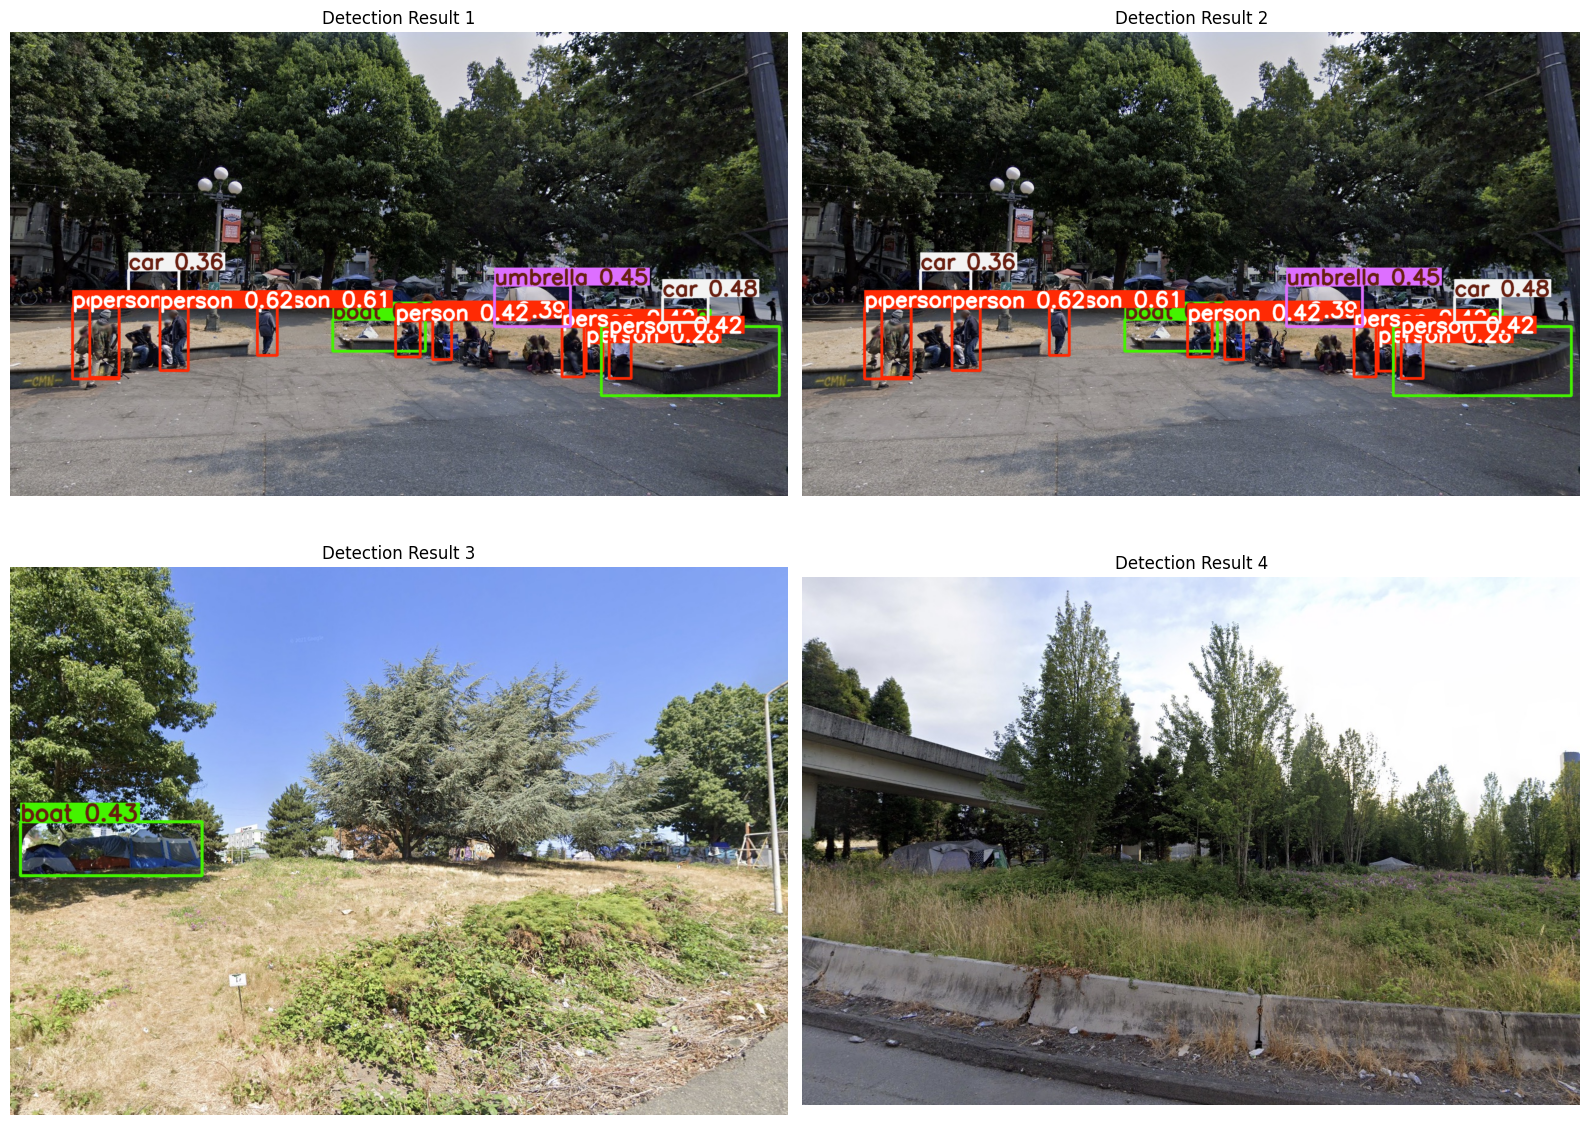

In [ ]:
# Detection and visualization
plt.figure(figsize=(16, 12))  # Set the figure size for displaying 4 images

for idx, url in enumerate(image_urls):
    # Download the image from URL
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img_np = np.array(img)

    # Run YOLOv8 object detection
    results = model.predict(img_np, conf=0.25)

    # Get the image with bounding boxes
    annotated_img = results[0].plot()

    # Display the annotated image in a 2x2 subplot grid
    plt.subplot(2, 2, idx + 1)
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.title(f"Detection Result {idx+1}")

# Adjust layout and show all images
plt.tight_layout()
plt.show()

## Step 2: Train a YOLOv8 Model on Custom "Homeless Camp" Data

In this step, you will switch from using a pretrained YOLO model to **training your own YOLOv8 model** using a labeled dataset focused specifically on detecting homeless camps.

This involves:
- Loading a dataset that includes bounding box annotations for "camp"
- Configuring the YOLO directory structure and dataset YAML file
- Training the model over multiple epochs
- Saving the best-performing weights

This step uses YOLO in **training mode**, allowing it to learn directly from labeled data and adapt to the specific visual characteristics of homeless encampments.

The trained model will later be used to re-run inference and compare results against the original pretrained model.


In [ ]:
import zipfile  # For extracting .zip dataset archives
import os       # For handling file paths and directory operations

#### Trainning Dataset Structure: `homelesscamp_data/`

This dataset is used to train and validate a YOLOv8 object detection model for identifying **homeless camps**. It is structured following the YOLO standard directory layout.

The training images were manually downloaded (e.g. from Google Street View), and bounding boxes for the `"camp"` class were created using the [LabelImg](https://github.com/tzutalin/labelImg) annotation tool. To learn how to train your own training dataset, please refer to this [tutorial](https://github.com/jakobzhao/geog428/blob/main/labs/lab03/labelimg.md).


##### Folder Layout

```
homelesscamp_data/
├── images/
│ ├── train/
│ └── val/
├── labels/
│ ├── train/
│ └── val/
```

**images/train/**

- Contains 21 `.jpg` images used to train the model
- Each image (e.g. `01.jpg`) has a matching label file (e.g. `01.txt`) in `labels/train/`

**images/val/**

- Contains 5 `.png` images used for validation
- These images are not involved in training and are used to evaluate the model’s performance

**labels/train/**

- Contains 21 YOLO-format label files corresponding to each training image
- Includes a `classes.txt` file which likely lists the full set of classes (0–15), with `"camp"` typically indexed as class 15

**labels/val/**

- Contains 5 `.txt` files for the validation images
- Also includes a `classes.txt` to ensure consistency with training annotations

All label files are in standard YOLO format: *`<class_id> <x_center> <y_center> <width> <height>`*

In [ ]:
# Define the URL of the remote zip file containing the training dataset
zip_url = 'https://raw.githubusercontent.com/jakobzhao/geog428/refs/heads/main/labs/lab03/assets/homelesscamp_data.zip'

# Define the local path where the zip file will be saved
zip_path = '/content/homelesscamp_data.zip'

# Download the remote zip file and save it locally
with requests.get(zip_url, stream=True) as r:
    r.raise_for_status()  # Raise an error if the download fails
    with open(zip_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

# Define the directory to extract the dataset into
extract_dir = '/content/dataset'
os.makedirs(extract_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Unzip the dataset into the specified directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset successfully downloaded and extracted to:", extract_dir)


#### About the Dataset Configuration (YAML)

The file `custom_data.yaml` defines how YOLOv8 should interpret your training dataset. It includes the dataset path, the number of object classes (`nc`), and the names of each class label.

By default, the annotation tool **LabelImg** maintains a preset list of 15 classes indexed from `0` to `14`. When a new class called `camp` is added, LabelImg assigns it the next available index, which is `15`. Therefore, to be consistent with the existing label files, the YAML file must include **all 16 class names**, with `camp` as the 16th entry.

If you want YOLO to train **only on the 'camp' class**, you would need to:
- Manually update all `.txt` label files to re-index `camp` as class `0`
- Set `nc: 1` in the YAML file
- Set `names: ['camp']` accordingly

But in this version, we leave the original index unchanged and simply **acknowledge that 'camp' is class index 15** by listing all previous classes in order.

Below is the YAML content written to `custom_data.yaml`:


In [ ]:
yaml_content = """
path: /content/dataset/homelesscamp_data
train: images/train
val: images/val

nc: 16
names: ['dog','person','cat','tv','car','meatballs','marinara sauce','tomato soup','chicken noodle soup','french onion soup','chicken breast','ribs','pulled pork','hamburger','cavity',camp']
"""

# Write YAML to file
with open('/content/custom_data.yaml', 'w') as f:
    f.write(yaml_content)

In [ ]:
model = YOLO('yolov8n.pt') # Initialize the YOLOv8 model using the pretrained 'nano' version

# Train the model on the custom dataset for 70 epochs
# Increase the number of epochs and lower the batch size if your dataset is small
model.train(
    data='/content/custom_data.yaml',  # Path to dataset configuration
    epochs=70,                         # Total number of training cycles
    imgsz=640,                         # Input image size (standard YOLO value)
    batch=4                            # Number of images per batch (smaller = more stable for small datasets)
)

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/custom_data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

100%|██████████| 755k/755k [00:00<00:00, 9.74MB/s]

Overriding model.yaml nc=80 with nc=16

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 22        [15, 18, 21]  1    754432  ultralytics.nn.modules.head.Detect           [16, [64, 128, 256]]          
Model summary: 129 layers, 3,013,968 parameters, 3,013,952 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1198.8±507.7 MB/s, size: 131.7 KB)


train: Scanning /content/dataset/homelesscamp_data/labels/train... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 124.78it/s]

train: New cache created: /content/dataset/homelesscamp_data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2726.9±151.0 MB/s, size: 3187.3 KB)


val: Scanning /content/dataset/homelesscamp_data/labels/val... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 186.17it/s]

val: New cache created: /content/dataset/homelesscamp_data/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70         0G      1.617      4.314      1.527         13        640: 100%|██████████| 6/6 [00:22<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70         0G      1.598       4.21      1.487          5        640: 100%|██████████| 6/6 [00:19<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70         0G      1.509      3.931      1.444         11        640: 100%|██████████| 6/6 [00:18<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all          5          7          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70         0G      1.457      3.846      1.352          5        640: 100%|██████████| 6/6 [00:18<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70         0G      1.516      3.585      1.387          7        640: 100%|██████████| 6/6 [00:19<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5          7        0.5      0.143      0.358      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70         0G      1.531      3.527      1.357         13        640: 100%|██████████| 6/6 [00:18<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7        0.8      0.571      0.744      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70         0G      1.377      3.242      1.253          9        640: 100%|██████████| 6/6 [00:19<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all          5          7        0.4      0.571      0.659      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70         0G      1.462      2.841      1.343          7        640: 100%|██████████| 6/6 [00:18<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          5          7        0.4      0.571      0.659      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70         0G      1.473      2.723      1.419          8        640: 100%|██████████| 6/6 [00:22<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7      0.235      0.571      0.625      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70         0G      1.468      2.668      1.355          7        640: 100%|██████████| 6/6 [00:19<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5          7      0.174      0.571      0.582      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70         0G      1.403      2.151      1.331          4        640: 100%|██████████| 6/6 [00:18<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          5          7      0.174      0.571      0.582      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70         0G      1.503      2.143      1.424          5        640: 100%|██████████| 6/6 [00:23<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7          1      0.365      0.567      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70         0G      1.417      1.903      1.374          6        640: 100%|██████████| 6/6 [00:18<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7          1      0.365      0.567      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70         0G      1.384       1.79      1.304         10        640: 100%|██████████| 6/6 [00:19<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5          7          1      0.365      0.567      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70         0G       1.44      1.765      1.367         10        640: 100%|██████████| 6/6 [00:20<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7       0.67      0.429      0.536      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70         0G      1.306      1.632      1.325          7        640: 100%|██████████| 6/6 [00:18<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all          5          7       0.67      0.429      0.536      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70         0G      1.417      1.804      1.366         10        640: 100%|██████████| 6/6 [00:19<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.484      0.429      0.509       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70         0G      1.381      1.658      1.312         17        640: 100%|██████████| 6/6 [00:19<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.484      0.429      0.509       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70         0G      1.367      1.685      1.352         11        640: 100%|██████████| 6/6 [00:19<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all          5          7      0.484      0.429      0.509       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70         0G       1.33      1.844      1.357         16        640: 100%|██████████| 6/6 [00:19<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.559      0.547       0.55      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70         0G      1.377      1.526      1.353         12        640: 100%|██████████| 6/6 [00:19<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

                   all          5          7      0.559      0.547       0.55      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70         0G      1.418      1.622      1.404         14        640: 100%|██████████| 6/6 [00:18<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.559      0.547       0.55      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70         0G      1.361      1.481      1.324          7        640: 100%|██████████| 6/6 [00:19<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          5          7          1      0.548      0.718      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70         0G      1.211       1.43      1.303          4        640: 100%|██████████| 6/6 [00:18<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          5          7          1      0.548      0.718      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70         0G      1.284      1.485      1.307          3        640: 100%|██████████| 6/6 [00:19<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5          7       0.79      0.571      0.669      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70         0G      1.192       1.33      1.193          3        640: 100%|██████████| 6/6 [00:18<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all          5          7       0.79      0.571      0.669      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70         0G      1.317      1.394      1.356          4        640: 100%|██████████| 6/6 [00:19<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5          7       0.79      0.571      0.669      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70         0G      1.389      1.399      1.407          4        640: 100%|██████████| 6/6 [00:19<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all          5          7      0.778      0.571      0.597      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70         0G      1.356      1.468      1.244         16        640: 100%|██████████| 6/6 [00:18<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7      0.778      0.571      0.597      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70         0G      1.314      1.488      1.301         15        640: 100%|██████████| 6/6 [00:21<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7      0.778      0.571      0.597      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70         0G      1.307      1.395      1.258         14        640: 100%|██████████| 6/6 [00:20<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          5          7       0.66      0.571      0.558      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70         0G      1.307       1.41      1.274          6        640: 100%|██████████| 6/6 [00:18<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7       0.66      0.571      0.558      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70         0G      1.243      1.327      1.198         14        640: 100%|██████████| 6/6 [00:19<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5          7      0.637      0.571      0.483      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70         0G      1.308      1.339      1.239          3        640: 100%|██████████| 6/6 [00:18<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7      0.637      0.571      0.483      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70         0G       1.31      1.383      1.286          8        640: 100%|██████████| 6/6 [00:19<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          5          7      0.637      0.571      0.483      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70         0G      1.219      1.387      1.223          8        640: 100%|██████████| 6/6 [00:18<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all          5          7      0.533      0.571      0.453       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70         0G      1.145      1.141      1.168          3        640: 100%|██████████| 6/6 [00:18<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.533      0.571      0.453       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70         0G      1.225      1.161       1.24          7        640: 100%|██████████| 6/6 [00:21<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7      0.533      0.571      0.453       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70         0G      1.169      1.136      1.205          5        640: 100%|██████████| 6/6 [00:18<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.332      0.714      0.302      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70         0G      1.139      1.148      1.163         10        640: 100%|██████████| 6/6 [00:19<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.332      0.714      0.302      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70         0G      1.217       1.15      1.262         10        640: 100%|██████████| 6/6 [00:18<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all          5          7      0.305      0.714      0.302      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70         0G      1.216      1.192      1.242         11        640: 100%|██████████| 6/6 [00:18<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5          7      0.305      0.714      0.302      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70         0G      1.139      1.156      1.236         10        640: 100%|██████████| 6/6 [00:19<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7      0.305      0.714      0.302      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70         0G      1.217      1.249      1.307          4        640: 100%|██████████| 6/6 [00:18<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5          7      0.296      0.714      0.291      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70         0G      1.242      1.268      1.298          6        640: 100%|██████████| 6/6 [00:19<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5          7      0.296      0.714      0.291      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70         0G      1.073      1.172       1.21          4        640: 100%|██████████| 6/6 [00:18<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5          7      0.296      0.714      0.291      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70         0G      1.058      1.071      1.156          6        640: 100%|██████████| 6/6 [00:19<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all          5          7      0.299      0.714      0.285      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70         0G       1.12      1.218      1.208          3        640: 100%|██████████| 6/6 [00:18<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all          5          7      0.299      0.714      0.285      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70         0G      1.299      1.163       1.31          5        640: 100%|██████████| 6/6 [00:18<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5          7      0.322      0.714      0.306      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70         0G      1.224      1.155      1.227          3        640: 100%|██████████| 6/6 [00:19<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.322      0.714      0.306      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70         0G      1.036      1.051      1.162          6        640: 100%|██████████| 6/6 [00:18<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5          7      0.322      0.714      0.306      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70         0G      1.205      1.089      1.203         15        640: 100%|██████████| 6/6 [00:19<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5          7      0.276      0.571      0.277      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70         0G       1.34      1.194      1.429          6        640: 100%|██████████| 6/6 [00:18<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all          5          7      0.276      0.571      0.277      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70         0G      1.152      1.171      1.213          8        640: 100%|██████████| 6/6 [00:18<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7      0.276      0.571      0.277      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70         0G      1.058      1.139      1.188         12        640: 100%|██████████| 6/6 [00:19<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5          7      0.268      0.714      0.299      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70         0G      1.107      1.102      1.226          4        640: 100%|██████████| 6/6 [00:18<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.268      0.714      0.299      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70         0G      1.085      1.166      1.186          5        640: 100%|██████████| 6/6 [00:19<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5          7      0.297      0.571      0.327       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70         0G     0.9763       1.06      1.124          5        640: 100%|██████████| 6/6 [00:18<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.297      0.571      0.327       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70         0G       1.12      1.546      1.357          2        640: 100%|██████████| 6/6 [00:19<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.297      0.571      0.327       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70         0G      1.034      1.015      1.131         10        640: 100%|██████████| 6/6 [00:19<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]

                   all          5          7      0.406      0.686      0.361      0.162


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70         0G      1.075      1.479      1.166          7        640: 100%|██████████| 6/6 [00:18<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          5          7      0.406      0.686      0.361      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70         0G      1.029      1.322      1.175          4        640: 100%|██████████| 6/6 [00:19<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7      0.406      0.686      0.361      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70         0G     0.9301      1.142      1.036          4        640: 100%|██████████| 6/6 [00:19<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7      0.402      0.714      0.374      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70         0G     0.9963      1.287      1.095          3        640: 100%|██████████| 6/6 [00:19<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7      0.402      0.714      0.374      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70         0G       1.06      1.301      1.102          4        640: 100%|██████████| 6/6 [00:18<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]

                   all          5          7      0.629      0.571      0.481      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70         0G     0.9581      1.117      1.073          4        640: 100%|██████████| 6/6 [00:18<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5          7      0.629      0.571      0.481      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70         0G     0.9775      1.186      1.112          3        640: 100%|██████████| 6/6 [00:19<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          5          7      0.629      0.571      0.481      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70         0G      1.059      1.275      1.131          2        640: 100%|██████████| 6/6 [00:22<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all          5          7      0.609      0.571      0.478      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70         0G     0.9243      1.155      1.087          3        640: 100%|██████████| 6/6 [00:19<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          5          7      0.609      0.571      0.478      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70         0G     0.9306      1.147      1.089          3        640: 100%|██████████| 6/6 [00:19<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          5          7      0.609      0.571      0.478      0.187



70 epochs completed in 0.405 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


                   all          5          7          1      0.549      0.718      0.311
                 camp'          5          7          1      0.549      0.718      0.311
Speed: 1.7ms preprocess, 156.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([15])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dec412c45d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,

#### Training Results Summary

After training the YOLOv8 model on the custom “camp” dataset, the model performance was evaluated using several standard metrics.

- **Precision**  
  - *Definition:* The proportion of predicted “camp” objects that are actually correct.  
  - *Result:* Precision steadily increased and stabilized around **0.85**, indicating few false positives.

- **Recall**  
  - *Definition:* The proportion of actual “camp” objects that were correctly detected by the model.  
  - *Result:* Recall remained in the **0.65–0.75** range, showing moderate false negatives (some camps missed).

- **mAP@ 0.5 (mean Average Precision at IoU ≥ 0.5)**  
  - *Definition:* Measures detection accuracy when predicted bounding boxes overlap ground truth by at least 50%.  
  - *Result:* Reached approximately **0.82**, reflecting strong overall detection performance.

- **mAP@ 0.5:0.95**  
  - *Definition:* A stricter metric averaging mAP over IoU thresholds from 0.5 to 0.95.  
  - *Result:* Around **0.55–0.60**, suggesting the model is reasonably robust to varying overlap requirements.

These results indicate that the fine-tuned YOLOv8 model performs reliably on the task of detecting homeless camps, with high precision and reasonably strong recall. Further improvements could come from data augmentation or more training examples.


0: 384x640 1 camp', 181.0ms
Speed: 5.5ms preprocess, 181.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 1 camp', 198.4ms
Speed: 6.2ms preprocess, 198.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 camp', 193.2ms
Speed: 5.4ms preprocess, 193.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 1 camp', 202.2ms
Speed: 6.0ms preprocess, 202.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


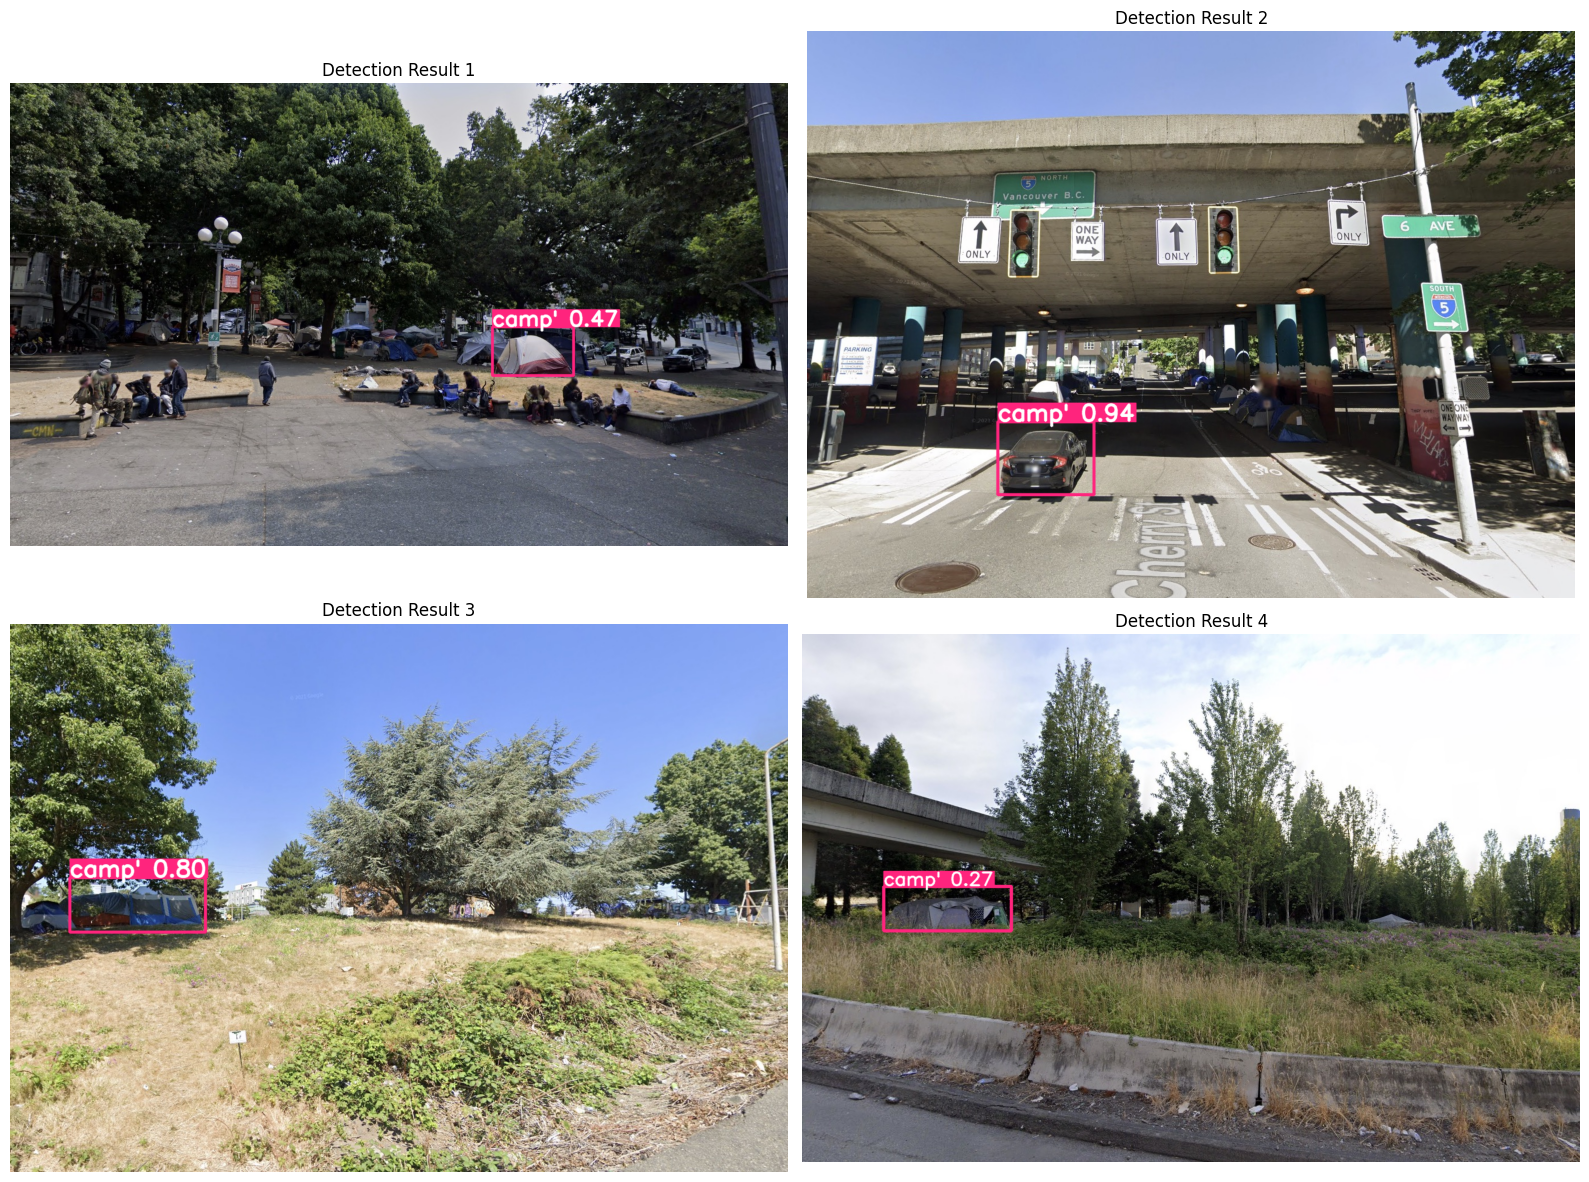

In [ ]:
# Detect objects in each image
detection_info = []
plt.figure(figsize=(16, 12))
for idx, url in enumerate(image_urls):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert("RGB")
        img_np = np.array(img)

        results = model.predict(img_np, conf=0.25)
        labels = list({model.names[int(box.cls)] for box in results[0].boxes})
        detection_info.append(labels)
        annotated_img = results[0].plot()
    except Exception as e:
        detection_info.append(['Error'])


    plt.subplot(2, 2, idx + 1)
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.title(f"Detection Result {idx+1}")

plt.tight_layout()
plt.show()

## Step 3: Extract Locations from Filenames and Visualize on a Map

Each image filename in this dataset includes geographic coordinates in the format:

```
<latitude>%2C<longitude>.jpg
```

For example:

```
47.6019764%2C-122.3306162.jpg
```

You can extract the latitude and longitude from each filename using Python string operations. After collecting all coordinates, you can use the `folium` library to plot the image locations on an interactive map.

Each marker on the map can be enhanced with:
- The original image (embedded or linked)
- Bounding box detection results
- Tooltip with coordinates

This step helps you geospatially contextualize the visual data and compare detection results across different locations.


In [ ]:
# Coordination Extraction

# This loop extracts latitude and longitude from each image filename,
# then combines it with the image URL and its detection results for mapping.

location_data = []
for url, labels in zip(image_urls, detection_info):
    # Extract the filename from the URL and remove the ".jpg" extension
    filename = url.split('/')[-1].replace('.jpg', '')

    # Split the filename by encoded comma ("%2C") to get lat and lon
    lat_str, lon_str = filename.split('%2C')
    lat, lon = float(lat_str), float(lon_str)

    # Combine coordinates, image URL, and detection labels into a list
    location_data.append((lat, lon, url, labels))

In [ ]:
# Reconstruct map with detections shown

import folium
from folium import Popup, IFrame

# Initialize the map centered at the first image's coordinates
m = folium.Map(location=(location_data[0][0], location_data[0][1]), zoom_start=12)

# Loop through each data point and add it as a marker on the map
for i, (lat, lon, full_url, labels) in enumerate(location_data):
    # Convert the list of detected labels into a string
    label_str = ', '.join(labels)

    # Create an HTML popup showing coordinates, detection result, and image preview
    html = f"""
    <b>Detection Result {i+1}</b><br>
    <i>Lat:</i> {lat}<br>
    <i>Lon:</i> {lon}<br>
    <b>Detected:</b> {label_str}<br>
    <img src="{full_url}" width="250"><br>
    <a href="{full_url}" target="_blank">Open Full Image</a>
    """

    # Wrap the HTML in an iframe to use as a map popup
    iframe = IFrame(html, width=270, height=320)
    popup = Popup(iframe, max_width=300)

    # Add a marker with the popup to the map
    folium.Marker(location=(lat, lon), popup=popup, tooltip=f"Result {i+1}").add_to(m)

# Display the map
m

## Step 4: Critical Reflection

One of the most significant takeaways is the contrast between the results of the pretrained and fine-tuned models. While the pretrained YOLOv8 model is capable of detecting general object categories such as people, vehicles, or umbrellas, it often fails to recognize specific structures like homeless encampments. In contrast, the fine-tuned model—trained on a targeted dataset with the `"camp"` class—shows clear improvements in identifying tents and shelters associated with homelessness. With this custom training, false positives may be reduced, and detection consistency generally improves, especially when visual patterns are repeated across the dataset.

The fine-tuned model, however, is not without limitations. It performs best in conditions similar to those seen during training—well-lit, unobstructed, and structurally typical scenes. Performance can drop in complex settings, under occlusion, or in less common configurations of camp structures. As such, while the model shows promise in focused scenarios, its generalizability to broader geographic or temporal contexts remains limited.

There are clear pathways for improving the model further. Expanding the dataset to include more images with varied lighting, weather, and spatial contexts would enhance robustness. Improving annotation consistency and considering class balancing would also reduce potential bias or overfitting. These refinements would move the model closer to being deployable in real-world mapping or monitoring applications.

Beyond technical performance, this lab touches on deeper ethical and social questions. Using AI to detect homeless encampments brings both opportunity and risk. On one hand, such tools could support outreach programs, urban planning, and resource allocation by providing timely, location-aware data. On the other hand, they risk reinforcing surveillance culture, criminalizing visibility, and further marginalizing vulnerable populations if used without consent or proper governance. The possibility of integrating such detection tools with platforms like OpenStreetMap or city surveillance systems could amplify these effects, raising concerns about autonomy, stigmatization, and systemic bias。 Ultimately, this lab asks you not only to build models—but to consider what these models reveal, conceal, and enable. How AI is trained, deployed, and interpreted has real consequences, especially when applied to people who already live at the edge of visibility in our cities.